In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
import numpy as np
import csv
import os
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.alert import Alert # 경고창
from selenium.webdriver.chrome.options import Options # 크롬 드라이버 자동 설치
from selenium.webdriver.chrome.service import Service # 크롬 드라이버 자동 설치
from webdriver_manager.chrome import ChromeDriverManager # 크롬 드라이버 자동 설치 
# 구글 드라이버를 사용하기 위한 설정
options = webdriver.ChromeOptions() # 크롬 옵션 객체 생성
# options.add_argument("headless") # 창 숨기기
options.add_argument('window-size=1920x1080') # 창 크기 설정
options.add_argument("disable-gpu") # GPU 사용 안함
options.add_argument("lang=ko_KR") # 언어 설정















































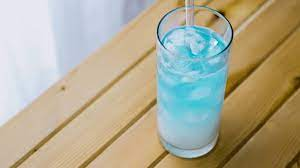
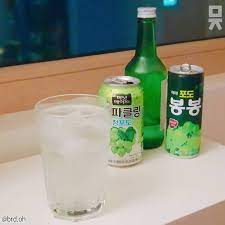
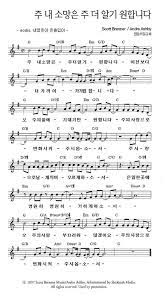
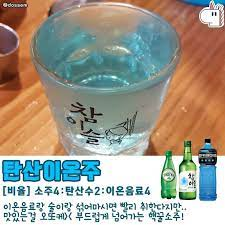
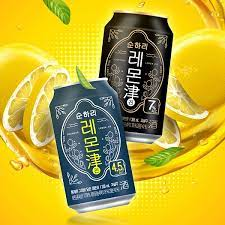
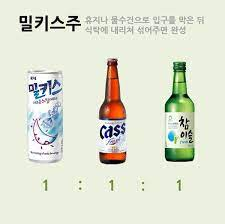
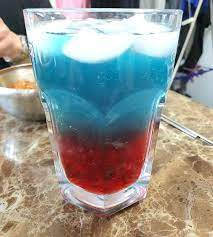
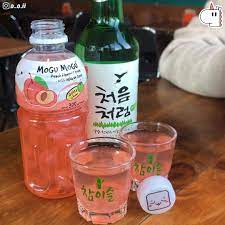
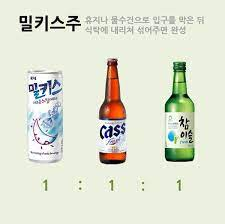
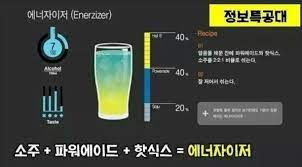
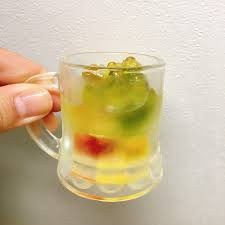
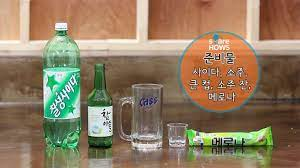
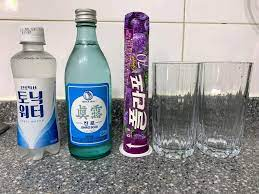
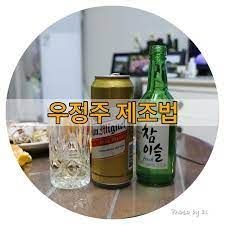
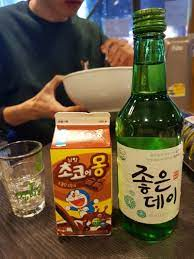
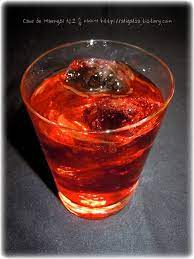
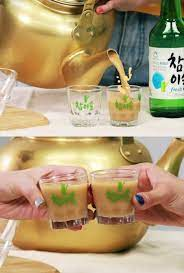
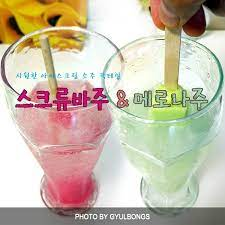
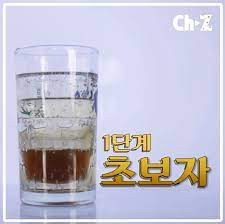
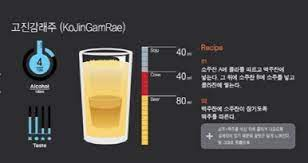
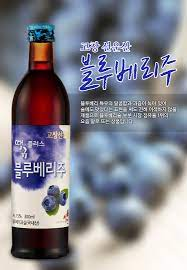
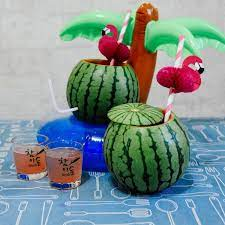
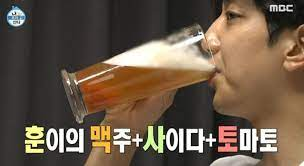
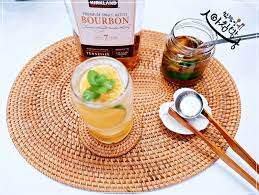
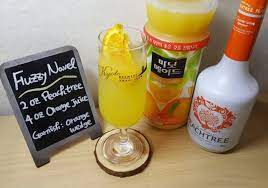
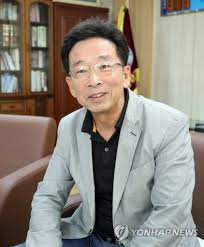
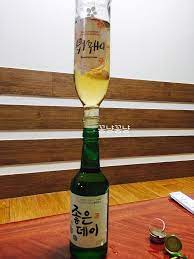
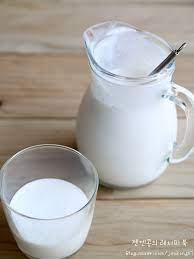
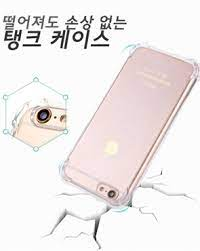
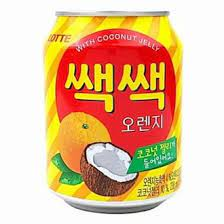
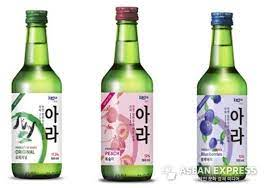
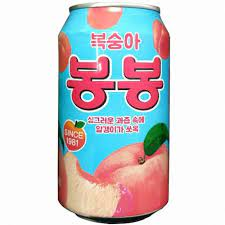
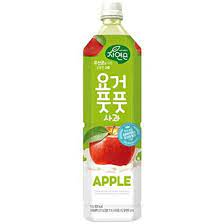
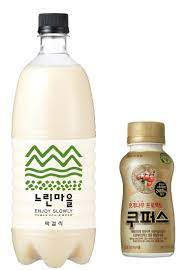
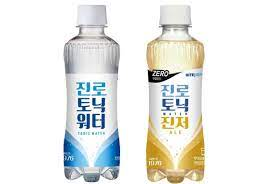
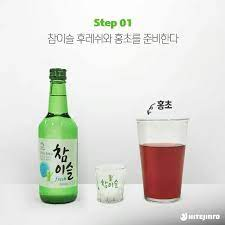
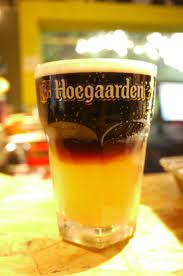
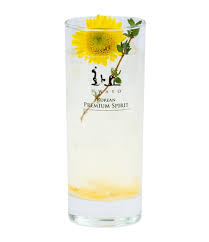
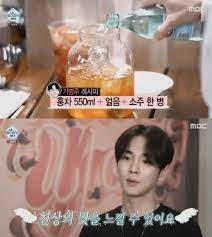
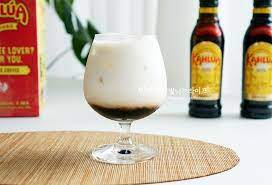
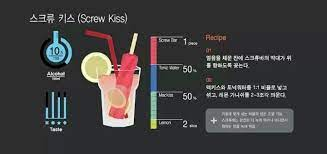
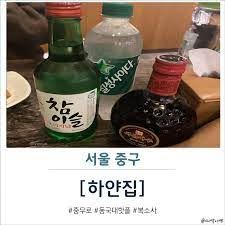
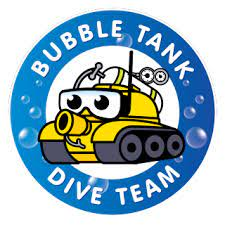
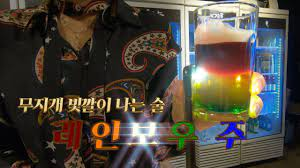

In [8]:
import base64
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options) # 크롬 드라이버 객체 생성
# myimages폴더가 없으면 생성한다.
if not os.path.exists('myimages'): # os.path.exists는 폴더가 있는지 확인한다.
    os.makedirs('myimages') # os.makedirs는 폴더를 생성한다.

for i in range(len(title_list)):

    keyword = title_list[i]

    # 구글 검색창에 내가입력한 keyword 검색한다.
    driver.get('https://www.google.com/')
    driver.find_element(By.NAME, 'q').send_keys(keyword)
    driver.find_element(By.NAME, 'q').send_keys(Keys.ENTER)

    # 사진 검색
    driver.find_element(By.LINK_TEXT, '이미지').click() # link_text는 링크 텍스트를 찾는다. 

    # # 1번째 이미지 클릭
    # driver.find_element(By.CSS_SELECTOR, 'img.rg_i.Q4LuWd').click() # css_selector는 css 선택자를 찾는다.

    # 1번째 이미지의 링크 주소를 가져온다.
    img = driver.find_element(By.CSS_SELECTOR, 'img.rg_i.Q4LuWd')
    img_src = img.get_attribute('src')

    # base64로 인코딩된 주소가 img_src에 저장되어 있다.
    # 디코딩을 한다
    print(img_src)    
    # img_data = base64.b64decode(img_src.split(',')[1])  # split(',')[1]은 base64로 인코딩된 이미지만 가져온다. 
    img_data = base64.b64decode(img_src[img_src.find(',')+1:])  

    # # 디코딩된 이미지를 저장한다.
    with open(f'myimages/{i}_{keyword}.png', 'wb') as f: # wb는 write binary
        f.write(img_data)



In [21]:
df = pd.read_csv('./resource/칵테일목록가공완료.csv')

In [22]:
# df title을 리스트로 만들어준다.
title_list = df['title'].tolist()
title_list

# title_list의 6번째 밀키스주를 없앤다
del title_list[6]
title_list


['블루레몬에이드밀키스주',
 '탄산봉봉주',
 '소망주',
 '탄산이온주',
 '레몬주',
 '밀키스주',
 '모구모구주',
 '밀키스주',
 '에너자이저주',
 '젤리주',
 '메로나주',
 '폴라포주',
 '우정주',
 '초코에몽주',
 '홍초주',
 '미숫가루주',
 '스크류바주',
 '고진감래주',
 '소맥사',
 '블루베리주',
 '수박주',
 '맥사토',
 '과일청 하이볼',
 '퍼지네이블',
 '소원주',
 '링겔주',
 '크림막걸리',
 '탱크젤리주',
 '쌕쌕주',
 '아소주',
 '복숭아봉봉주',
 '요거풋풋주',
 '요구르트주',
 '소토닉',
 '홍익인간주',
 '더티호',
 '화요토닉',
 '기범주',
 '깔루아밀크',
 '스크류키스 칵테일',
 '복소사',
 '버블탱크',
 '무지개주']

In [23]:
len(title_list)

43

In [9]:
import pandas as pd
import pymysql
from config import Config
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import boto3
import os
import sys
import time
import datetime
import json
import logging
import logging.config
import configparser

In [10]:
# df 

,title,ingredient1,ingredient2,ingredient3,ingre_ratio1,ingre_ratio2,ingre_ratio3,비율,레시피임시,레시피
0,블루레몬에이드밀키스주,소주,밀키스,블루레몬에이드,4,3.0,3.0,4:3:3,"소주, 밀키스, 블루레몬에이드","소주, 밀키스, 블루레몬에이드를 4:3:3 비율로 섞어서 만들어요"
1,탄산봉봉주,소주,포도봉봉,탄산수,4,3.0,3.0,4:3:3,"소주, 포도봉봉, 탄산수","소주, 포도봉봉, 탄산수를 4:3:3 비율로 섞어서 만들어요"
2,소망주,소주,망고링고,NaN,3,7.0,NaN,3:7,"소주, 망고링고","소주, 망고링고를 3:7 비율로 섞어서 만들어요"
3,탄산이온주,소주,탄산,이온음료,4,2.0,4.0,4:2:4,"소주, 탄산, 이온음료","소주, 탄산, 이온음료를 4:2:4 비율로 섞어서 만들어요"
4,레몬주,소주,레몬맛 탄산음료,NaN,4,6.0,NaN,4:6,"소주, 레몬맛 탄산음료","소주, 레몬맛 탄산음료를 4:6 비율로 섞어서 만들어요"
5,밀키스주,소주,밀키스,NaN,4,6.0,NaN,4:6,"소주, 밀키스","소주, 밀키스를 4:6 비율로 섞어서 만들어요"
6,태극주,소주,빨간과일식초,파란이온음료,1,1.0,1.0,1:1:1,"소주, 빨간과일식초, 파란이온음료","소주, 빨간과일식초, 파란이온음료를 1:1:1 비율로 섞어서 만들어요"
7,모구모구주,소주,모구모구,NaN,2,8.0,NaN,2:8,"소주, 모구모구","소주, 모구모구를 2:8 비율로 섞어서 만들어요"
8,밀키스주,소주,맥주,밀키스,1,1.0,1.0,1:1:1,"소주, 맥주, 밀키스","소주, 맥주, 밀키스를 1:1:1 비율로 섞어서 만들어요"
9,에너자이저주,소주,파워에이드,핫식스,2,2.0,2.0,2:2:2,"소주, 파워에이드, 핫식스","소주, 파워에이드, 핫식스를 2:2:2 비율로 섞어서 만들어요"


In [24]:
conn = pymysql.connect(host=Config.HOST, user=Config.DB_USER, password=Config.DB_PASSWORD, db=Config.DATABASE, charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor)

sql = "select * from recipe"
curs.execute(sql)
cocktail = curs.fetchall()
cocktail
conn.close()
curs.close()



In [25]:
# cocktail을 df로 만들어준다.
df = pd.DataFrame(cocktail)
df[["id","title"]]

,id,title
0,1,블루레몬에이드밀키스주
1,2,탄산봉봉주
2,3,소망주
3,4,탄산이온주
4,5,레몬주
5,6,태극주
6,7,모구모구주
7,8,밀키스주
8,9,에너자이저주
9,10,젤리주


In [27]:
from datetime import datetime

In [35]:
with Image.open('./myimages/{}_{}.png'.format(1,df.loc[0,"title"])) as img:
    with BytesIO() as output:
        img.save(output, format='PNG')
        contents = output.getvalue()
        print(contents)
        print(type(contents))
        print(len(contents))
        print(datetime.now())
        # print(contents.decode('utf-8'))
        # print(type(contents.decode('utf-8')))
        # print(len(contents.decode('utf-8')))
        # print(datetime.now())

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x00\xa8\x08\x02\x00\x00\x00\xd5IDX\x00\x00\xf2\xe0IDATx\x9c\xec\xfdi\xcct[v\x1e\x86\xada\xef3\xd5\xf8N\xdfx\xa7\x9e\xbb\xd9\x9cE\x8a4eJb4D\xa2"P\x94\x12EQ$\x05\x96\xe1@\xb2\x12\xc0q\x90\x1f\x81\x02\xff1\x1c(\t\x02\x03\x8e\xe1\xc0\x0e\x90@\x92\x03\xd0\xd1\x10I\xa4d9\xa4(\x92\x8a(\x92\xe2\xd4\x1c\x9blv7ow\xdf{\xbf\xe9\x9d\xaa\xea\x0c{Xk\xe5\xc7\xa9\xaa\xaf\xbe\xe9\xf6\xbd\xdd\x97b7\x99\x85\x17\xf5\x9es\xea\xd4\xa9Sg\xefg\xafy-|\xeb\xadk\xf8\xed D\x04\x003\x1bw\xf7\x1b\xd7)\x8d\xbbff\x86\xe3?0\x12\x11\x00\xda\xed\xee\x8e\x03$\x95\xb7\xf9\x16;\xa0q\xd7\x13\x8f\xdfNDx@\xce\xb9\xfdm<{W\xcf\xbe\x95s>\xbc\xb8\xaa\x8eo)\x1f\xfc.\xdd~\x84\x0cr\xce\xa6\x9aRJ)\xc5!\x8c\x1b\xaa\x8a\x99\x0c\x01\xd1\x8c\x10\x19\x10\x01\xc8\x080\xa5\xa4"\x96\x05\xb2\x80\xa23dd"\xe2\xaaEv\xe0\x1b+j\xe12\x93K\x06fB\x16j\xcc\r\x85\tv\x95\xac}Za\xd8\x98\xc4\x8d\xdd\'@\x87\xe4\x89\x0bd\x87\x8e\x89\x08Y\x89\x8d\x0ba\xca\xe8"`P\xebD\xc4\xe0v\xeeV\x17\xe7W\x97\x0frX\x

In [36]:
client = boto3.client('s3', 
                    aws_access_key_id = Config.ACCESS_KEY ,
                    aws_secret_access_key = Config.SECRET_ACCESS )
# 이미지 파일을 바이트로 가져와서 콘텐츠타입을 png로 지정한다음 s3에 업로드하고 url을 가져와서 db에 저장

 # db 연결
conn = pymysql.connect(host=Config.HOST, user=Config.DB_USER, password=Config.DB_PASSWORD, db=Config.DATABASE, charset='utf8')
# Connection 으로부터 Cursor 생성
curs = conn.cursor()
# 트랜잭션 시작
conn.begin()
try :
    for i in range(1,43+1):
        current_time = datetime.now()
        new_file_name = current_time.isoformat().replace(':', '_') + '.' + 'png'
        with Image.open('./myimages/{}_{}.png'.format(i,df.loc[i-1,"title"])) as img:

            img_bytes = BytesIO() # Create a BytesIO object
            img.save(img_bytes, format='PNG') # Convert the image to PNG format
            img_bytes.seek(0) # Move the pointer to the beginning of the file

            client.upload_fileobj(img_bytes, Config.BUCKET_NAME, 'recipe/'+ new_file_name,
                            ExtraArgs={'ACL': 'public-read', 'ContentType': 'image/png'})

            s3_url = f'https://{Config.BUCKET_NAME}.s3.amazonaws.com'
            image_url = f'{s3_url}/recipe/{new_file_name}'

            print(f'Image URL: {image_url}')
        sql = "UPDATE recipe SET imgUrl = %s WHERE id = %s"
        curs.execute(sql, (image_url, i))
        print(str(i)+"번째 " , df.loc[i-1,"title"], image_url)
    # # 100개마다 commit
    # if i % 100 == 0:
    #     conn.commit()
    # 모든 작업이 끝나면 commit
    conn.commit()
    conn.close()
    curs.close()
except Exception as e:
    # 에러가 발생하면 rollback
    conn.rollback()
    conn.close()
    curs.close()
    print(e)
    
    

Image URL: https://alcohol-app-jieun.s3.amazonaws.com/recipe/2023-03-28T18_01_05.763724.png
1번째  블루레몬에이드밀키스주 https://alcohol-app-jieun.s3.amazonaws.com/recipe/2023-03-28T18_01_05.763724.png
Image URL: https://alcohol-app-jieun.s3.amazonaws.com/recipe/2023-03-28T18_01_05.890185.png
2번째  탄산봉봉주 https://alcohol-app-jieun.s3.amazonaws.com/recipe/2023-03-28T18_01_05.890185.png
Image URL: https://alcohol-app-jieun.s3.amazonaws.com/recipe/2023-03-28T18_01_05.985784.png
3번째  소망주 https://alcohol-app-jieun.s3.amazonaws.com/recipe/2023-03-28T18_01_05.985784.png
Image URL: https://alcohol-app-jieun.s3.amazonaws.com/recipe/2023-03-28T18_01_06.475988.png
4번째  탄산이온주 https://alcohol-app-jieun.s3.amazonaws.com/recipe/2023-03-28T18_01_06.475988.png
Image URL: https://alcohol-app-jieun.s3.amazonaws.com/recipe/2023-03-28T18_01_06.585990.png
5번째  레몬주 https://alcohol-app-jieun.s3.amazonaws.com/recipe/2023-03-28T18_01_06.585990.png
Image URL: https://alcohol-app-jieun.s3.amazonaws.com/recipe/2023-03-28T18_01_

In [ ]:
try :
    for i in range(1,43+1):
        current_time = datetime.now()
        new_file_name = current_time.isoformat().replace(':', '_') + '.' + 'png'
        with Image.open('./myimages/{}_{}.png'.format(i,title_list[i-1])) as img:

            img_bytes = BytesIO() # Create a BytesIO object
            img.save(img_bytes, format='PNG') # Convert the image to PNG format
            img_bytes.seek(0) # Move the pointer to the beginning of the file